In [1]:
import schemdraw
import schemdraw.elements as elm
#schemdraw.use('svg')

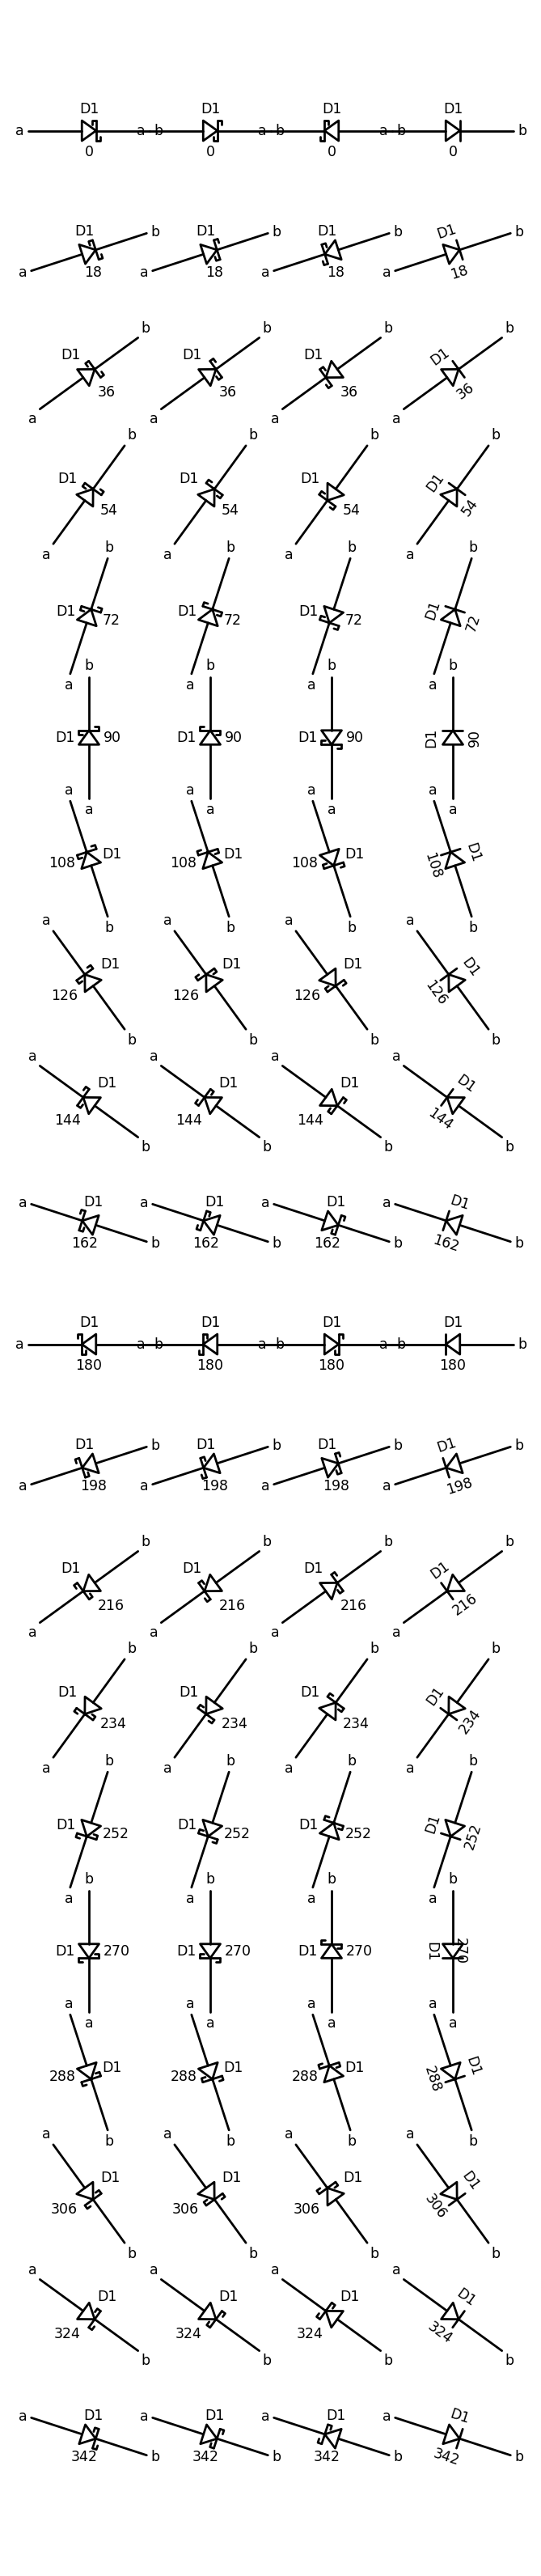

In [2]:
# Label offsets/rotations
# normal, flip, reverse, with-label-rotation
div = 20
step = 3
with schemdraw.Drawing() as d:
    for i in range(div):
        th = (360./div) * i
        R1 = (elm.Schottky().theta(th).label('D1').at((0, -i*step)).anchor('center')
                   .label('%.0f'%th, loc='bot')
                   .label('a', loc='lft')
                   .label('b', loc='rgt'))
        R2 = (elm.Schottky().theta(th).label('D1').at((step, -i*step)).anchor('center').flip()
           .label('%.0f'%th, loc='bot')
           .label('a', loc='lft')
           .label('b', loc='rgt'))
        R3 = (elm.Schottky().theta(th).label('D1').at((step*2, -i*step)).anchor('center').reverse()
           .label('%.0f'%th, loc='bot')
           .label('a', loc='lft')
           .label('b', loc='rgt'))
        R4 = (elm.Diode().theta(th).at((step*3, -i*step)).anchor('center')
           .label('D1', rotate=True)
           .label('%.0f'%th, loc='bottom', halign='center', rotate=th)
           .label('a', 'left')
           .label('b', 'right'))

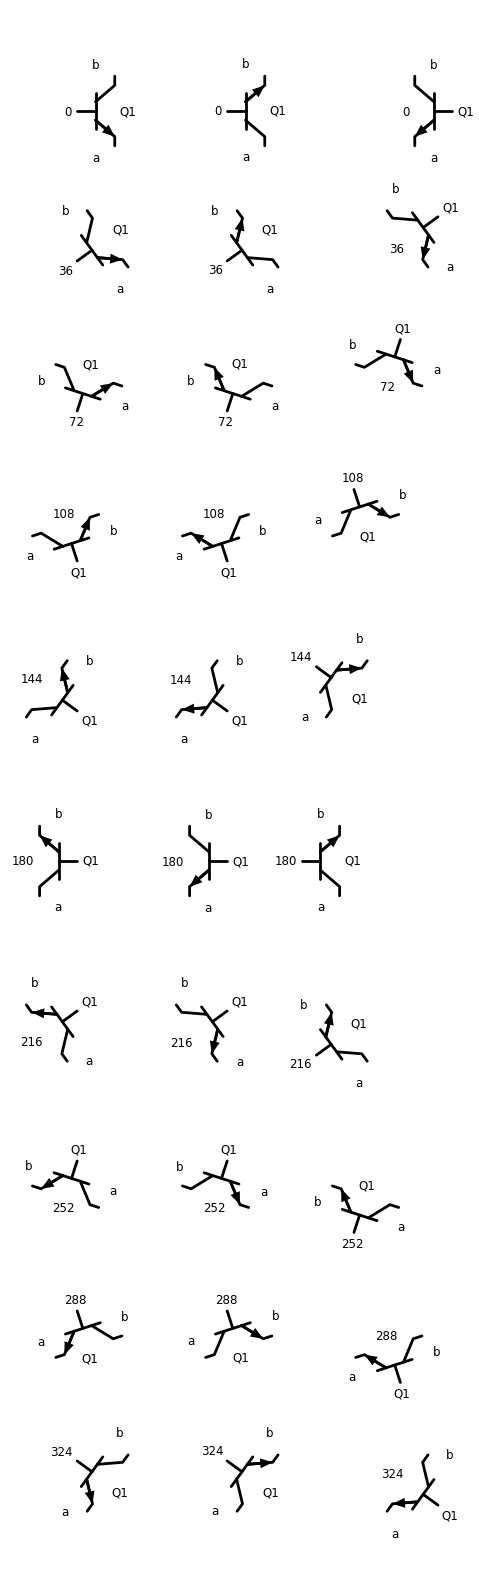

In [3]:
# Label offsets/rotations - BJT
# normal, flip, reverse
div = 10
step = 3
with schemdraw.Drawing(fontsize=10) as d:
    for i in range(div):
        th = (360./div) * i
        R1 = (elm.BjtNpn().theta(th).at((0, -i*step))
                   .label('Q1', 'rgt')
                   .label(format(th, '.0f'), 'lft')
                   .label('a', 'bot')
                   .label('b', 'top'))
        R1 = (elm.BjtNpn().theta(th).at((step, -i*step)).flip()
                   .label('Q1', 'rgt')
                   .label(format(th, '.0f'), 'lft')
                   .label('a', 'bot')
                   .label('b', 'top'))
        R1 = (elm.BjtNpn().theta(th).at((step*2, -i*step)).reverse()
                   .label('Q1', 'rgt')
                   .label(format(th, '.0f'), 'lft')
                   .label('a', 'bot')
                   .label('b', 'top'))

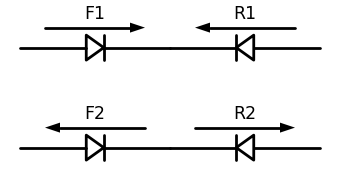

In [4]:
# Current label revereses itself when element it's placed on is reversed
with schemdraw.Drawing() as d:
    R = elm.Diode()
    elm.CurrentLabel().at(R).label('F1')
    R2 = elm.Diode().reverse()
    elm.CurrentLabel().at(R2).label('R1')

    R3 = elm.Diode().at((0, -2))
    elm.CurrentLabel(reverse=True).at(R3).label('F2')
    R4 = elm.Diode().reverse()
    elm.CurrentLabel(reverse=True).at(R4).label('R2')

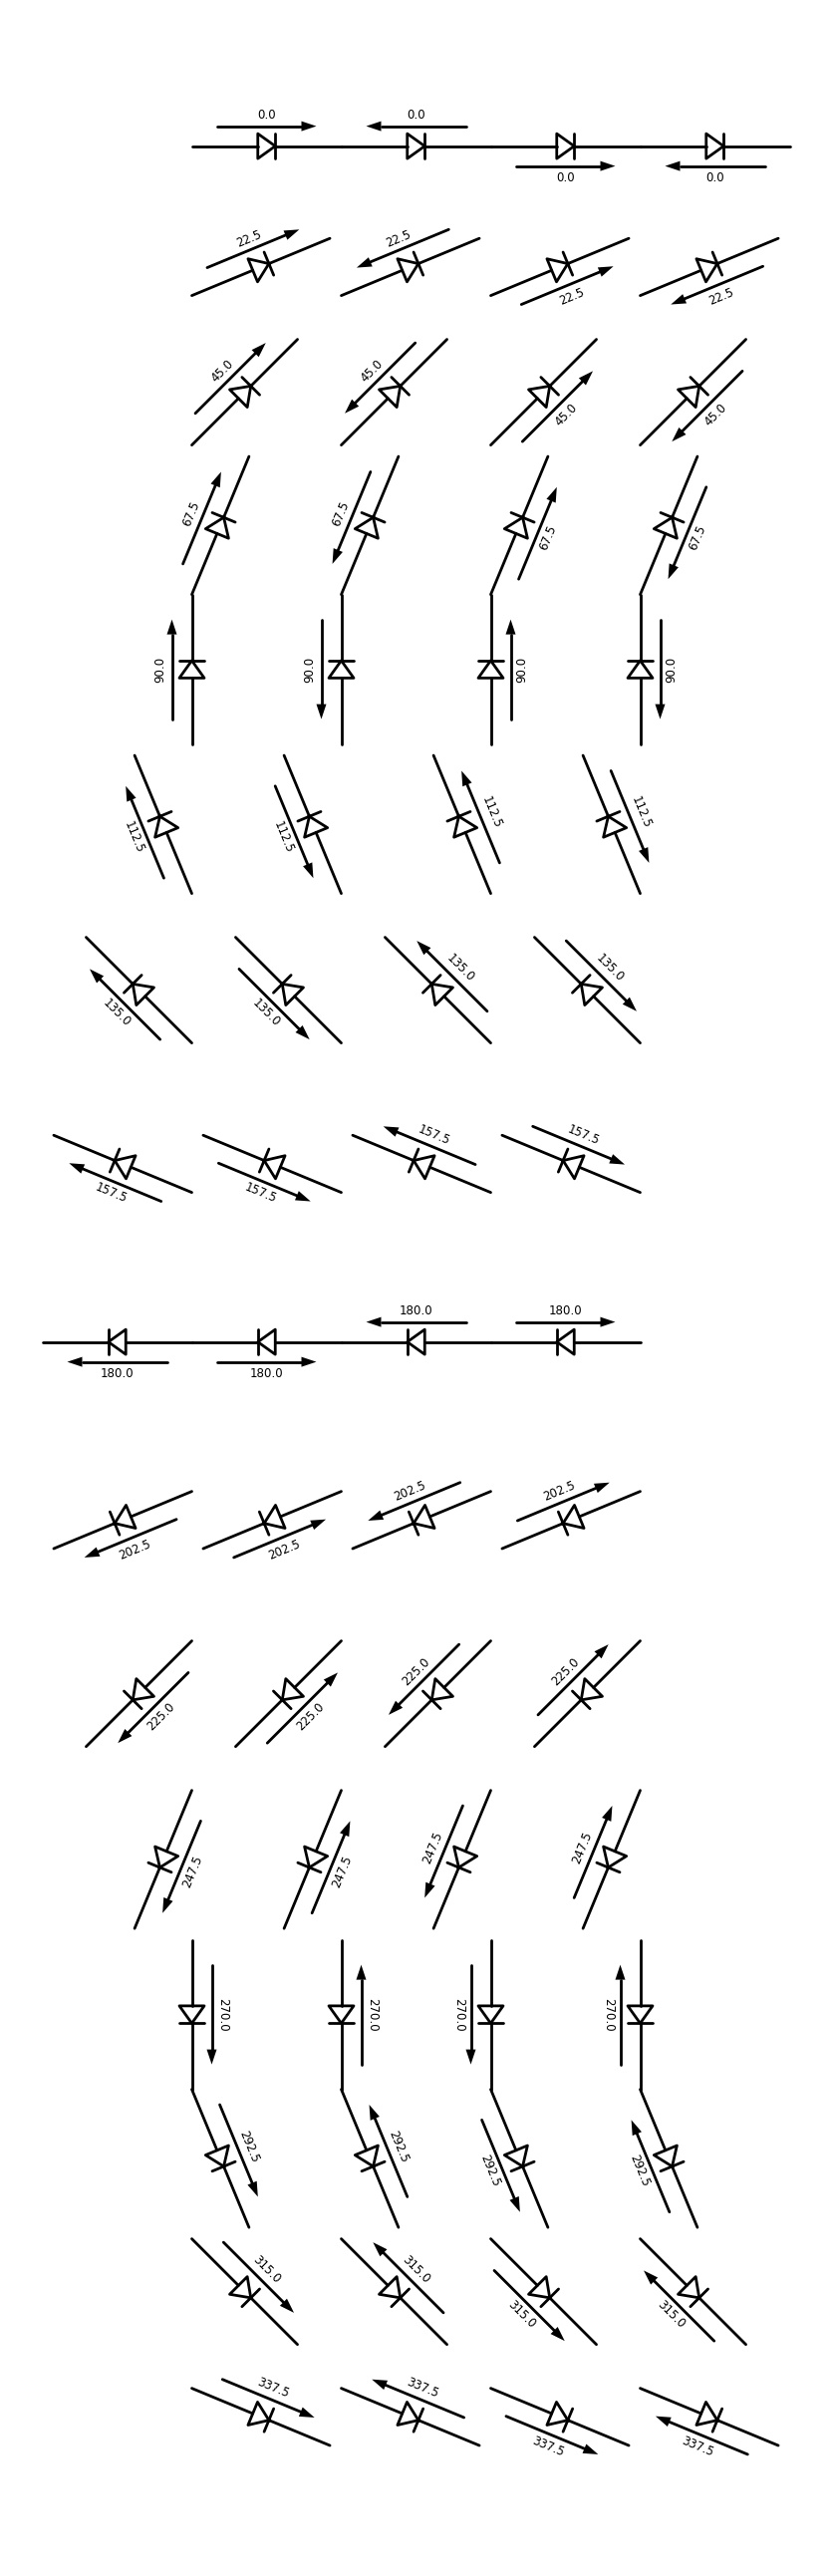

In [5]:
# Test CurrentLabel placement and text alignment

def test_currentlabel(element):
    div = 16
    step = 3
    with schemdraw.Drawing(fontsize=10) as d:
        for i in range(div):
            th = (360./div) * i
            R1 = element().theta(th).at((0, -i*step))
            elm.CurrentLabel(reverse=False).at(R1).label(str(th), rotate=True)
            R1 = element().theta(th).at((step, -i*step))
            elm.CurrentLabel(reverse=True).at(R1).label(str(th), rotate=True)
            R1 = element().theta(th).at((step*2, -i*step))
            elm.CurrentLabel(top=False, reverse=False).at(R1).label(str(th), rotate=True)
            R1 = element().theta(th).at((step*3, -i*step))
            elm.CurrentLabel(top=False, reverse=True).at(R1).label(str(th), rotate=True)

test_currentlabel(elm.Diode)

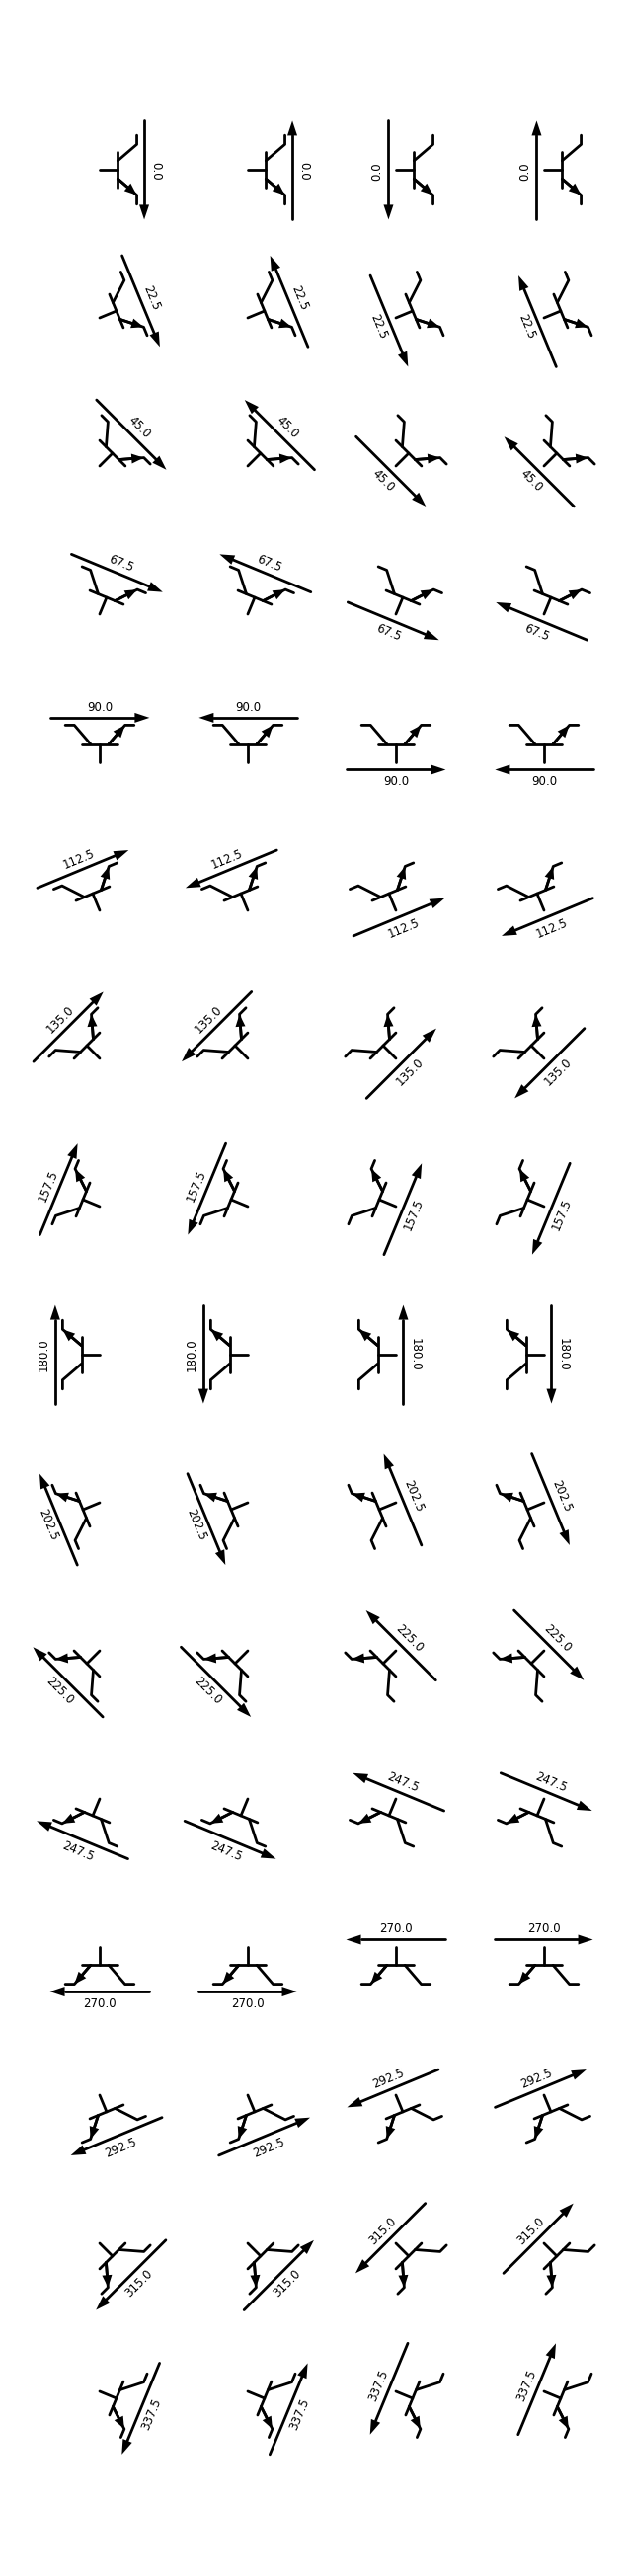

In [6]:
test_currentlabel(elm.BjtNpn)

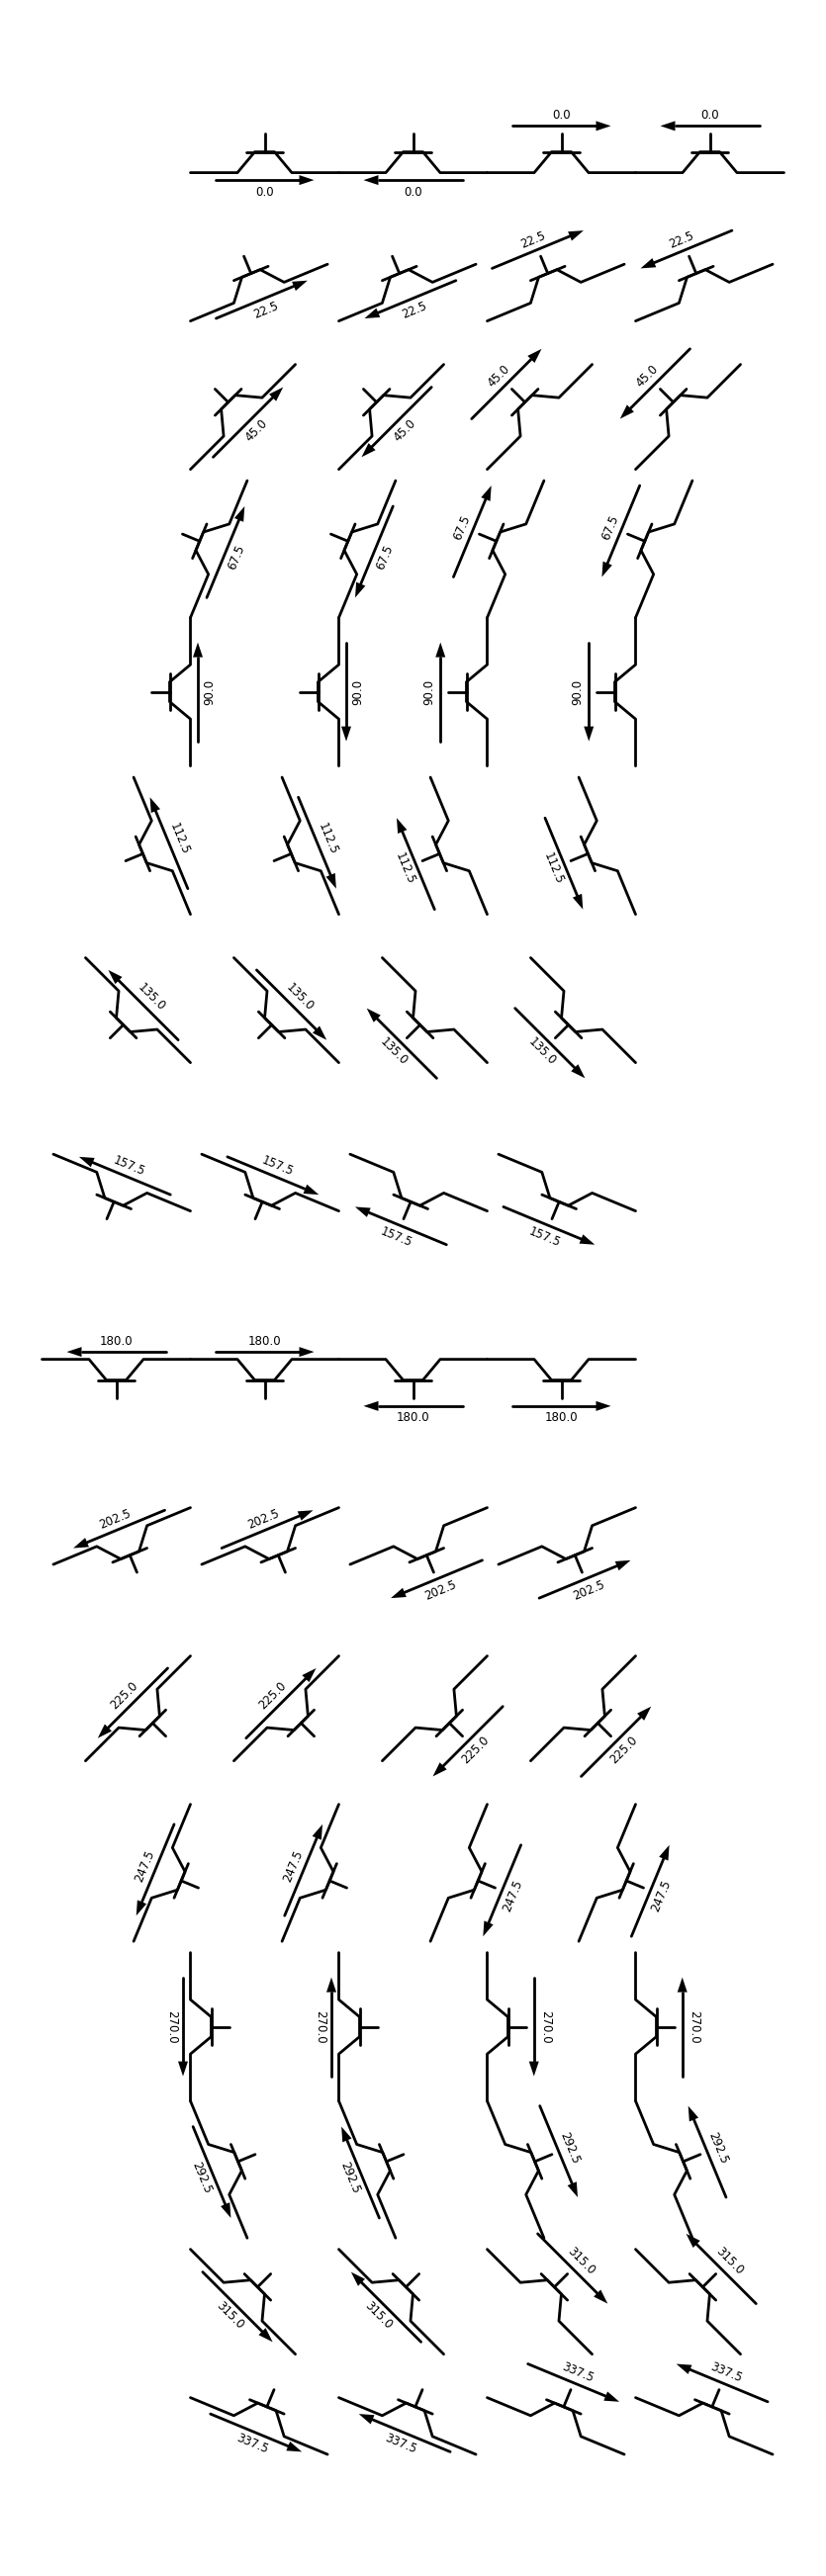

In [7]:
test_currentlabel(elm.Bjt2)

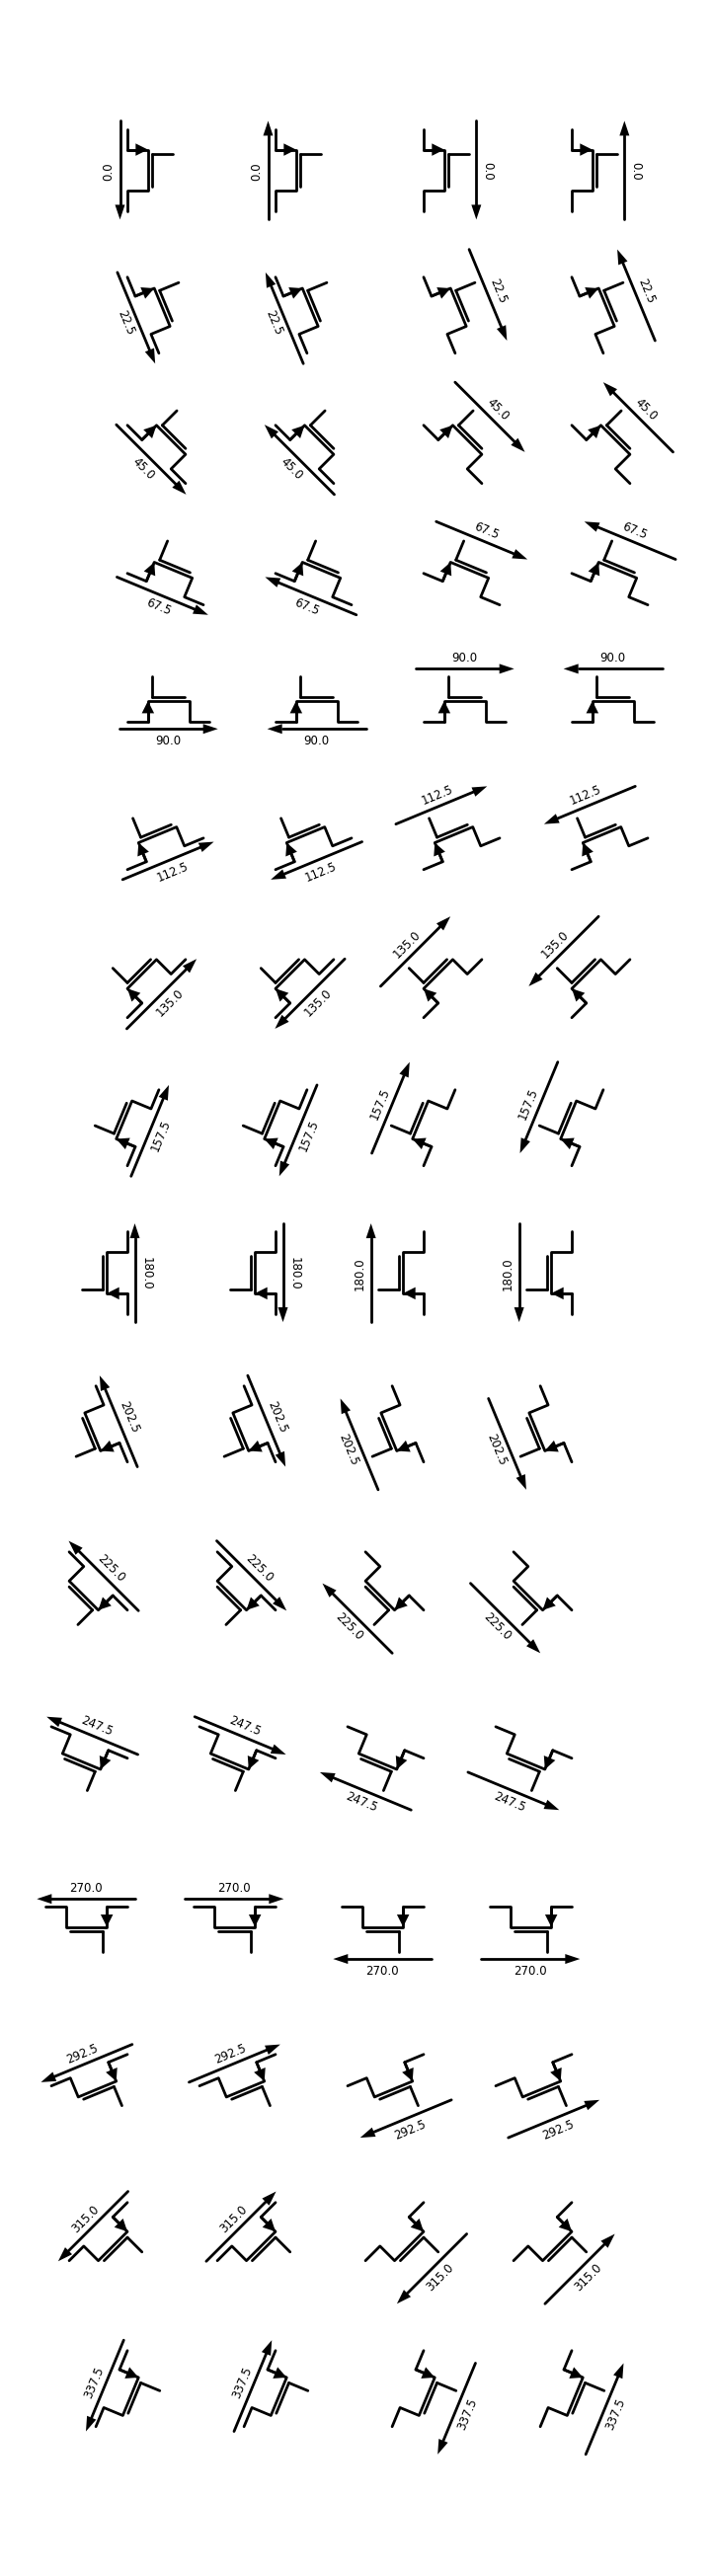

In [8]:
test_currentlabel(elm.AnalogPFet)

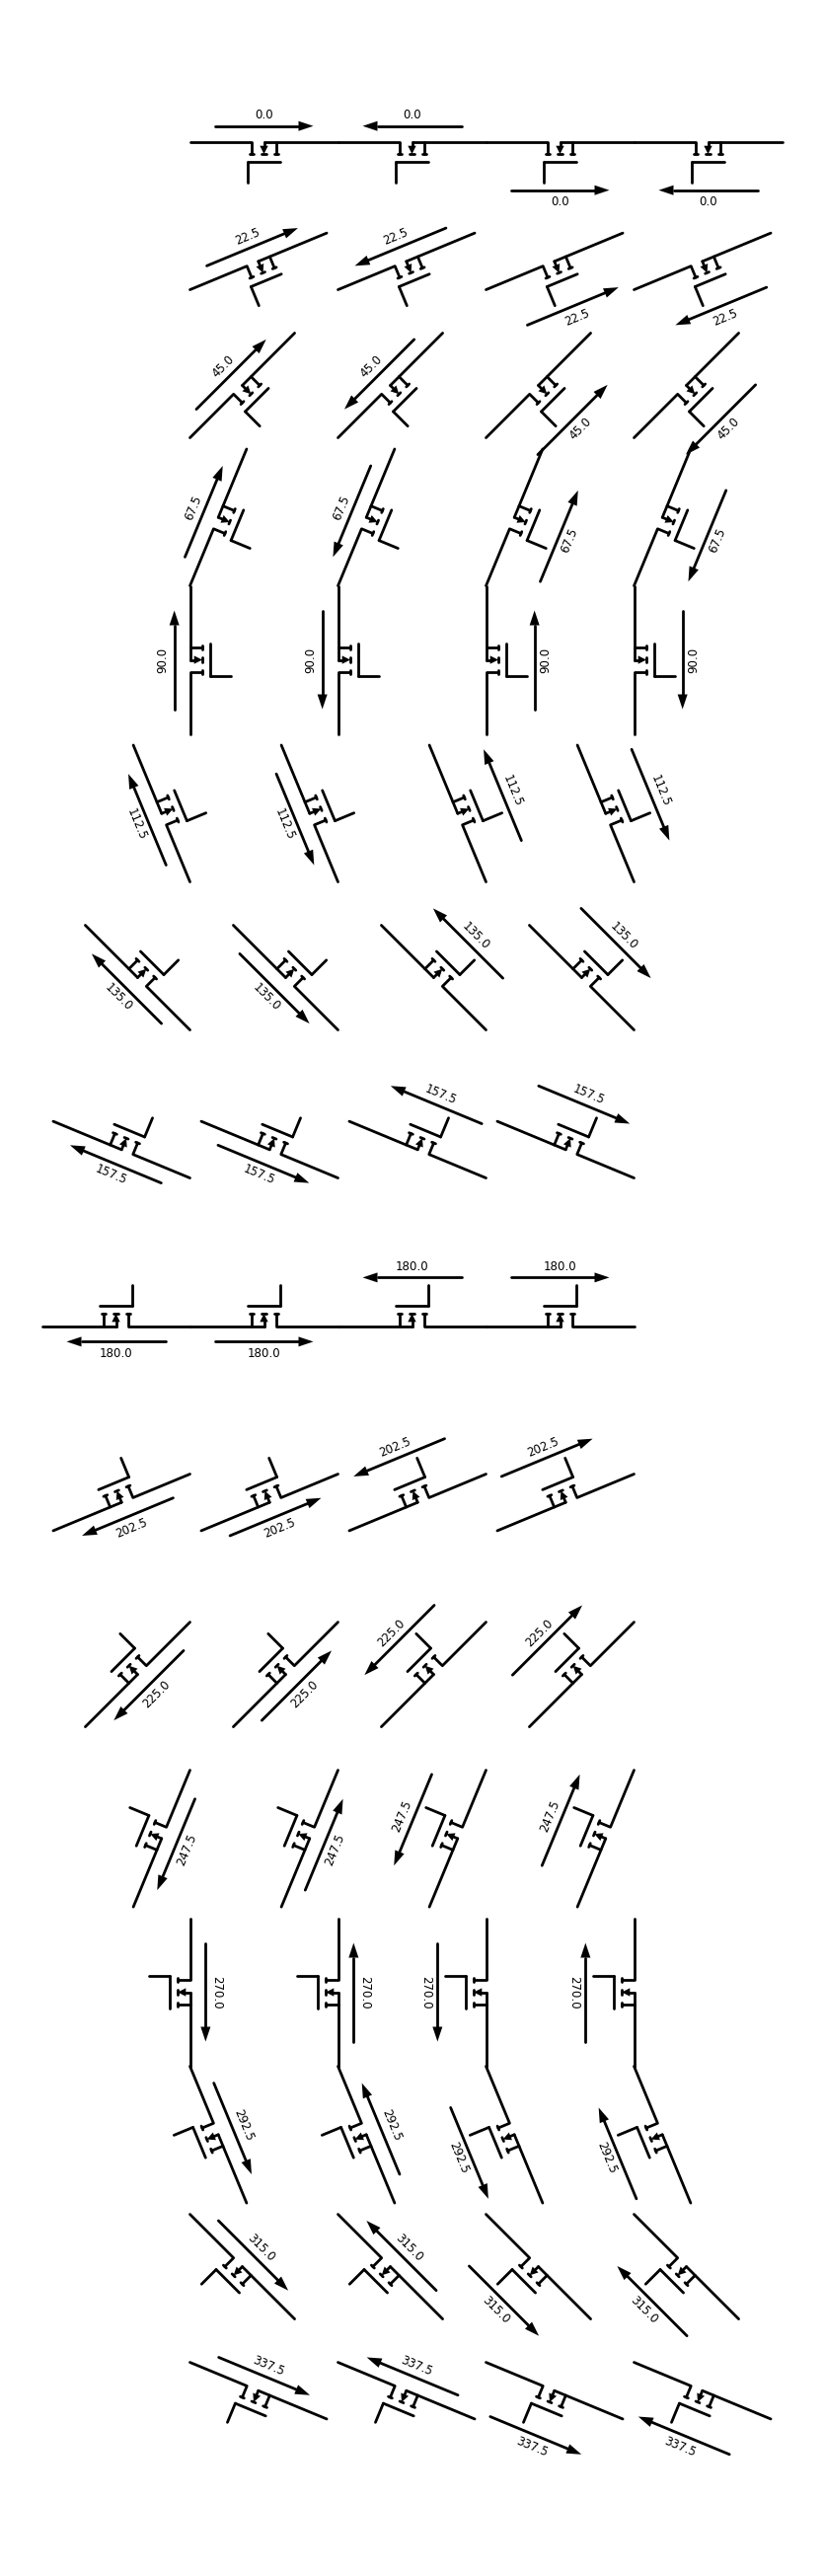

In [9]:
test_currentlabel(elm.NMos2)

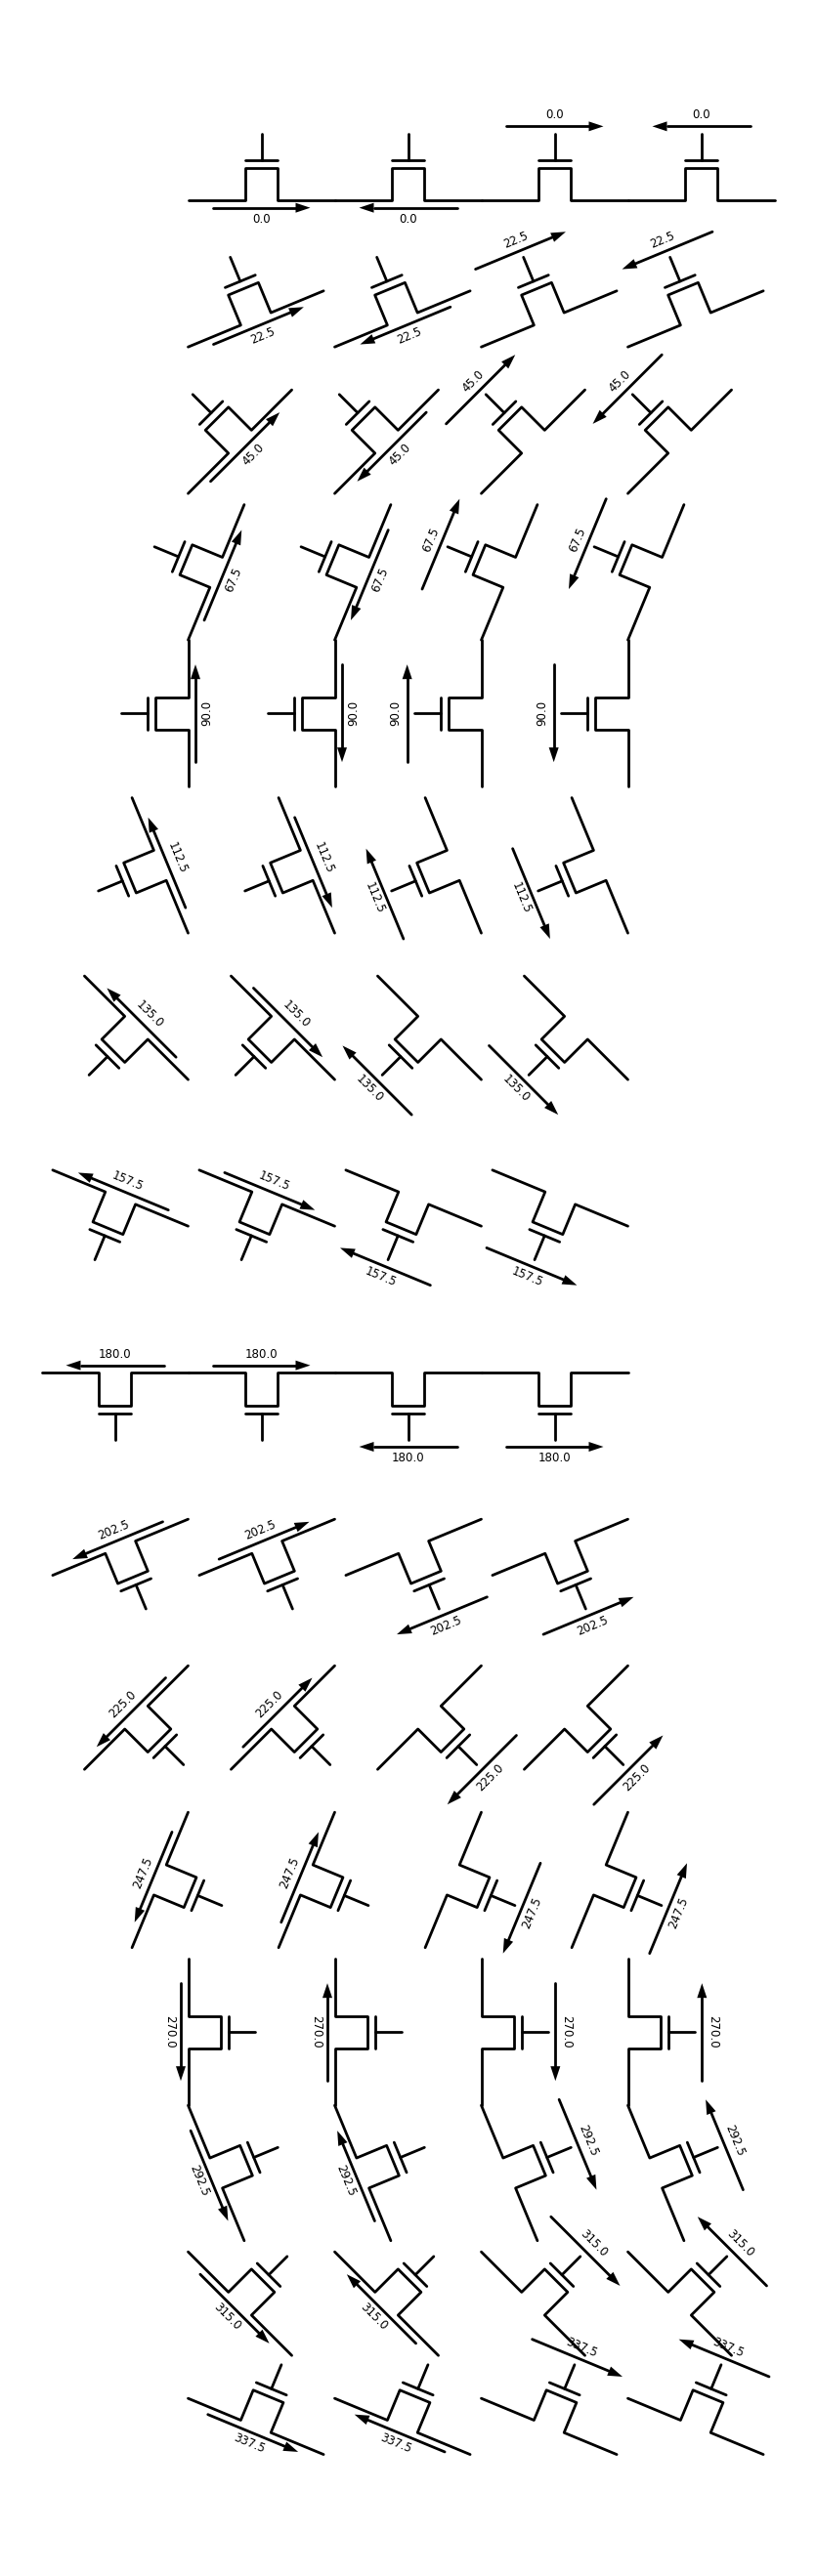

In [10]:
test_currentlabel(elm.NFet2)